In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 5000)

# SMM4H21

In [3]:
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv')
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv')

In [4]:
smm4h21_train.shape, smm4h21_test.shape

((1512, 7), (287, 7))

In [5]:
smm4h21_test

,term,start,end,text,code,STR,SNMS
0,nerves,119,125,@crohnietweets i found the humira to fix all m...,10029177,Nerve damage,"['Nerve injury', 'Nerve injury', 'Nerve injury..."
1,muscle spasms,126,139,@crohnietweets i found the humira to fix all m...,10028334,Muscle spasms,"['Spasm', 'Spasm, NOS', 'Muscle spasm', 'Muscl..."
2,gaining,61,68,@jennabear32819 have to go to a doc now to see...,10047896,Weight gain,"['Weight gain', 'Weight gain', 'Increased body..."
3,gain like 50 pounds,91,110,@jennabear32819 have to go to a doc now to see...,10047896,Weight gain,"['Weight gain', 'Weight gain', 'Increased body..."
4,frontal headache,118,134,06.30 day 14 Rivaroxaban diary. Thanks to para...,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
...,...,...,...,...,...,...,...
282,urge to procure food,84,104,waitt..here it comes..the #seroquel is pulling...,10021654,Increased appetite,"['Increased appetite (finding)', 'Increased ap..."
283,Swollen feet,116,128,day has been a right off. missed opticians&amp...,10042693,Swelling of feet,"['Edema of foot (finding)', 'Edema of foot', '..."
284,pains,52,57,rivaroxaban diary day 22. am beginning to thin...,10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
285,never sleeping,67,81,i wish i could be tired. shouldn't have taken ...,10041001,Sleep loss,[]


In [6]:
smm4h21_train['term'].apply(lambda x: len(x.split())).sum(), \
smm4h21_test['term'].apply(lambda x: len(x.split())).sum(), \
(smm4h21_train['start'] - smm4h21_train['end']).mean(), \
(smm4h21_train['start'] - smm4h21_train['end']).min(), \
(smm4h21_train['start'] - smm4h21_train['end']).max()

(3004, 571, -11.664021164021165, -105, -2)

In [7]:
smm4h21_train = smm4h21_train.dropna(axis=1)
smm4h21_train['code'] = smm4h21_train['code'].astype("int64")
smm4h21_train['span_len'] = smm4h21_train.apply(lambda x: x['end']-x['start'], axis=1)

smm4h21_test = smm4h21_test.dropna(axis=1)
smm4h21_test['code'] = smm4h21_test['code'].astype("int64")
smm4h21_test['span_len'] = smm4h21_test.apply(lambda x: x['end']-x['start'], axis=1)

In [8]:
smm4h21_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      1512 non-null   object
 1   start     1512 non-null   int64 
 2   end       1512 non-null   int64 
 3   text      1512 non-null   object
 4   code      1512 non-null   int64 
 5   STR       1512 non-null   object
 6   SNMS      1512 non-null   object
 7   span_len  1512 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 94.6+ KB


In [9]:
smm4h21_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      287 non-null    object
 1   start     287 non-null    int64 
 2   end       287 non-null    int64 
 3   text      287 non-null    object
 4   code      287 non-null    int64 
 5   STR       287 non-null    object
 6   SNMS      287 non-null    object
 7   span_len  287 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.1+ KB


<AxesSubplot:xlabel='code', ylabel='Count'>

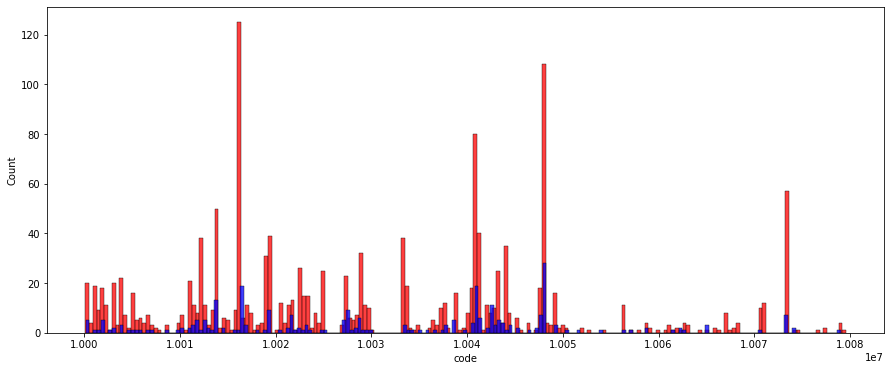

In [10]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h21_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')

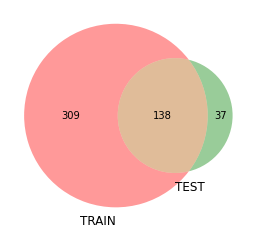

In [11]:
train_labels = set(smm4h21_train['code'].unique())
test_labels = set(smm4h21_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [12]:
smm4h21_train['code'] = smm4h21_train['code'].astype("category")
smm4h21_train.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,1512,1512.000000,1512.000000,1512,1512.0,1512,1512,1512.000000
unique,1003,NaN,NaN,1111,447.0,447,294,NaN
top,withdrawal,NaN,NaN,RT @ellus_cooper: @UCLAibd even w/ Humira: ab ...,10073281.0,Withdrawal symptom,[],NaN
freq,41,NaN,NaN,7,57.0,57,293,NaN
mean,NaN,58.708333,70.372354,NaN,NaN,NaN,NaN,11.664021
std,NaN,33.109812,33.521424,NaN,NaN,NaN,NaN,7.637265
min,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,2.000000
25%,NaN,32.000000,44.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,56.000000,68.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,83.250000,96.000000,NaN,NaN,NaN,NaN,14.000000


In [13]:
smm4h21_test['code'] = smm4h21_test['code'].astype("category")
smm4h21_test.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,287,287.000000,287.000000,287,287.0,287,287,287.000000
unique,255,NaN,NaN,254,175.0,175,122,NaN
top,withdrawal,NaN,NaN,cant cope coming off #venlafaxine feel like iv...,10047896.0,Weight gain,[],NaN
freq,6,NaN,NaN,5,14.0,14,54,NaN
mean,NaN,61.958188,73.644599,NaN,NaN,NaN,NaN,11.686411
std,NaN,35.565143,35.971033,NaN,NaN,NaN,NaN,6.553112
min,NaN,0.000000,12.000000,NaN,NaN,NaN,NaN,3.000000
25%,NaN,32.000000,44.500000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,63.000000,74.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,88.500000,100.000000,NaN,NaN,NaN,NaN,15.000000


In [48]:
train, test = smm4h21_train, smm4h21_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(8.0, (2655,), (1167,))

### SMM4H17

In [49]:
smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv')
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv')

smm4h17_train['code'] = smm4h17_train['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_train[smm4h17_train['code'].isna()].shape)
smm4h17_train = smm4h17_train[~smm4h17_train['code'].isna()]

smm4h17_test['code'] = smm4h17_test['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_test[smm4h17_test['code'].isna()].shape)
smm4h17_test = smm4h17_test[~smm4h17_test['code'].isna()]
smm4h17_train

(0, 4)
(0, 4)


,term,code,STR,SNMS
0,addict,10013663,Drug dependence,"['Drug dependence', 'Drug dependence', 'Drug d..."
1,allergic reaction,10020751,Hypersensitivity,"['Hypersensitivity', 'Hypersensitivity', 'Hype..."
2,pre-cutting,10022524,Intentional self-injury,[]
3,withdrawals,10048010,Withdrawal syndrome,[]
4,delirious,10012218,Delirium,"['Delirium', 'Delirium', 'Delirium', 'Delirium..."
...,...,...,...,...
6645,sedation,10039897,Sedation,"['Sedated state', 'Sedated', 'Under sedation',..."
6646,zombie,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
6647,hallucinations,10019063,Hallucination,"['Hallucinations', 'Hallucinations', 'Hallucin..."
6648,not go to sleep,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."


In [50]:
smm4h17_train.shape, smm4h17_test.shape

((6650, 4), (2499, 4))

In [51]:
smm4h17_test

,term,code,STR,SNMS
0,sleepier,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."
1,dreamt colors,10000125,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2,zombie,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
3,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
4,crazy,10061920,Psychotic disorder,"['Psychotic disorder, NOS', 'Psychotic disorde..."
...,...,...,...,...
2494,sleptwalk,10041347,Somnambulism,"['Somnambulism', 'Somnambulism', 'Somnambulism..."
2495,fatigue,10016256,Fatigue,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',..."
2496,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
2497,out of it,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


In [52]:
smm4h17_train['term'].apply(lambda x: len(x.split())).sum(), \
smm4h17_test['term'].apply(lambda x: len(x.split())).sum(), \
# (smm4h17_train['start'] - smm4h17_train['end']).mean(), \
# (smm4h17_train['start'] - smm4h17_train['end']).min(), \
# (smm4h17_train['start'] - smm4h17_train['end']).max()

(13375, 5319)

<AxesSubplot:xlabel='code', ylabel='Count'>

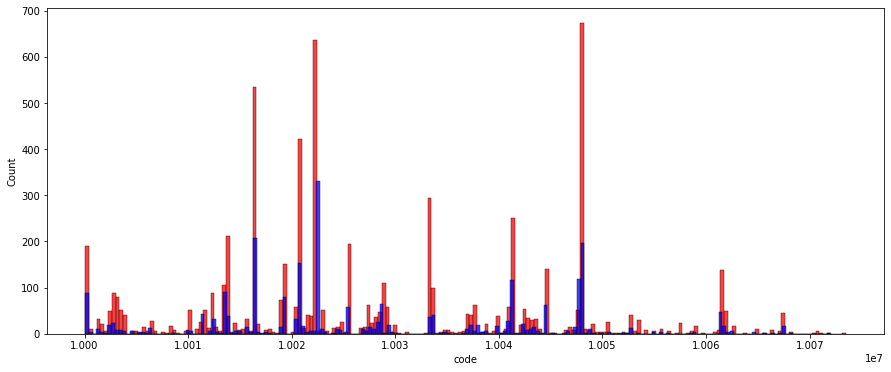

In [53]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

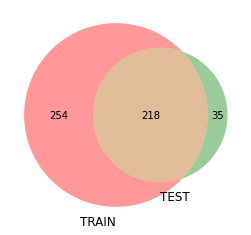

In [54]:
train_labels = set(smm4h17_train['code'].unique())
test_labels = set(smm4h17_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [55]:
smm4h17_train['code'] = smm4h21_train['code'].astype("category")
smm4h17_train.describe(include='all')

,term,code,STR,SNMS
count,6650,1512,6650,6650
unique,2833,447,472,418
top,withdrawal,10073281,Insomnia,[]
freq,226,57,634,641


In [56]:
smm4h17_test['code'] = smm4h17_test['code'].astype("category")
smm4h17_test.describe(include='all')

,term,code,STR,SNMS
count,2499,2499,2499,2499
unique,1194,253,253,228
top,withdrawal,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
freq,113,330,330,330


In [57]:
train, test = smm4h17_train, smm4h17_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(14.5, (3900,), (2244,))

# Compare SMM4h 17 and 21

In [58]:
smm4h_train = pd.concat([smm4h21_train, smm4h17_train], axis=0)
smm4h_test = pd.concat([smm4h21_test, smm4h17_test], axis=0)

smm4h_train.shape, smm4h_test.shape

((8162, 8), (2786, 8))

In [59]:
smm4h_train

,term,start,end,text,code,STR,SNMS,span_len
0,dying,39.0,44.0,@jkimberlinn im on cypro . actually in dying o...,10013767,Drunk-like effect,[],5.0
1,tired,49.0,54.0,the day after my humira jab and as ever i'm me...,10043890,Tiredness,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',...",5.0
2,don't have the energy,57.0,78.0,fucking effexor withdrawals. i would shake my ...,10024862,Loss of energy,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',...",21.0
3,withdrawals,27.0,38.0,@louiseypopssss quetiapine withdrawals.,10073281,Withdrawal symptom,"['Withdrawal symptom', 'Withdrawal complaint',...",11.0
4,crippled,89.0,97.0,@DoctorMcPA Had my doctor attempted to treat ...,10049278,Unable to walk,"['Unable to walk (finding)', 'Unable to walk']",8.0
...,...,...,...,...,...,...,...,...
6645,sedation,NaN,NaN,NaN,NaN,Sedation,"['Sedated state', 'Sedated', 'Under sedation',...",NaN
6646,zombie,NaN,NaN,NaN,NaN,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno...",NaN
6647,hallucinations,NaN,NaN,NaN,NaN,Hallucination,"['Hallucinations', 'Hallucinations', 'Hallucin...",NaN
6648,not go to sleep,NaN,NaN,NaN,NaN,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn...",NaN


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


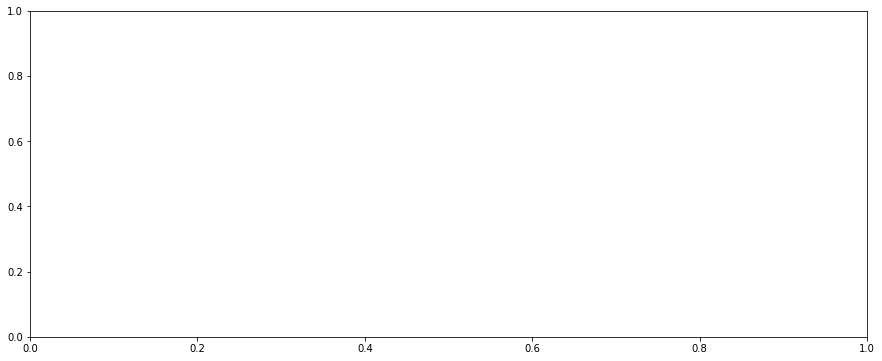

In [60]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

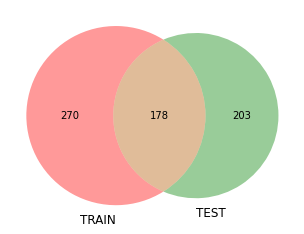

In [61]:
train_labels = set(smm4h_train['code'].unique())
test_labels = set(smm4h_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [62]:
smm4h_train['code'] = smm4h_train['code'].astype("category")
smm4h_train.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,8162,1512.000000,1512.000000,1512,3024.0,8162,8162,1512.000000
unique,3062,NaN,NaN,1111,447.0,801,537,NaN
top,withdrawal,NaN,NaN,RT @ellus_cooper: @UCLAibd even w/ Humira: ab ...,10073281.0,Insomnia,[],NaN
freq,267,NaN,NaN,7,114.0,659,934,NaN
mean,NaN,58.708333,70.372354,NaN,NaN,NaN,NaN,11.664021
std,NaN,33.109812,33.521424,NaN,NaN,NaN,NaN,7.637265
min,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,2.000000
25%,NaN,32.000000,44.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,56.000000,68.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,83.250000,96.000000,NaN,NaN,NaN,NaN,14.000000


# CADEC

In [63]:
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv')
cadec_test = pd.read_csv('../../data/interim/cadec/test.csv')
cadec_train

,term,start,end,sent,text,code,STR,SNMS
0,lethargy,0,8,lethargy and leg soreness.,lethargy and leg soreness.,10024264,Lethargy,"['Lethargy', 'Lethargy', 'Lethargy', 'Lethargi..."
1,Pain in the shoulders,34,55,A tingling sensation in the back of my neck.,Joint pain in the knees and hips.<SENT>Pain in...,10040617,Shoulder pain,"['Shoulder pain', 'Shoulder pain', 'Shoulder p..."
2,unable to walk,128,142,I stopped it 8 weeks ago and still have much m...,"Bouts of extreme forgetfulness, extreme muscle...",10049278,Unable to walk,"['Unable to walk (finding)', 'Unable to walk']"
3,hematuria,30,39,Lipitor caused permanent liver and kidney dama...,"Severe back pain, flank pain, hematuria, kidne...",10018867,['Hematuria' 'Haematuria'],"['Hematuria', 'Hematuria', 'Hematuria', 'Haema..."
4,Extreme vertigo,33,48,In decreasing order of severity: Extreme verti...,In decreasing order of severity: Extreme verti...,10047340,Vertigo,"['Vertigo', 'Vertigo', 'Vertigo', 'Vertigo, NO..."
...,...,...,...,...,...,...,...,...
3515,first vaginal bleeding,488,510,More problems and this time I had the ideo to ...,"I have vaginal bleeding, my cycle was back (I'...",10046883,Vaginal bleeding,"['Vaginal hemorrhage', 'Vaginal bleeding', 'Va..."
3516,significant limp,259,275,The drug worked wonders on cholesterol (down 8...,Left shoulder pain and right hip and muscle pa...,10058726,Limping,"['Lameness', 'Limping', 'Limp', 'Limping (find..."
3517,slightly blurred vision,50,73,All the symptoms largely disappeared after two...,"rapid shallow breathing, fatigue, disorientati...",10005886,Blurred vision,"['Blurred vision', 'Blurred vision', 'Blurred ..."
3518,tendonitis,46,56,No relief from any pain pills.,Severe shoulder and upper body pain including ...,10066371,Tendon pain,"['Tenalgia', 'Tendon pain', 'Tenodynia', 'Tena..."


In [64]:
cadec_train.shape, cadec_test.shape, 

((3520, 8), (881, 8))

In [65]:
cadec_train['term'].apply(lambda x: len(x.split())).sum(), \
cadec_test['term'].apply(lambda x: len(x.split())).sum(), \
(cadec_train['start'] - cadec_train['end']).mean(), \
(cadec_train['start'] - cadec_train['end']).min(), \
(cadec_train['start'] - cadec_train['end']).max()

(9122, 2200, -13.458238636363637, -130, -3)

<AxesSubplot:xlabel='code', ylabel='Count'>

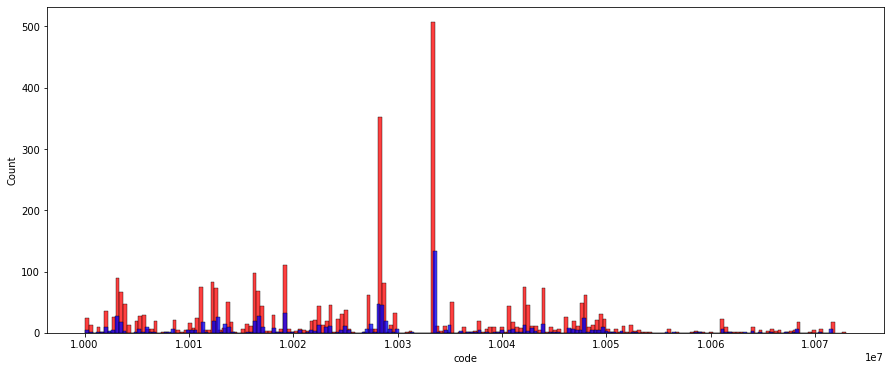

In [66]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=cadec_train['code'], bins=bins, color='red')
sns.histplot(data=cadec_test['code'], bins=bins, color='blue')

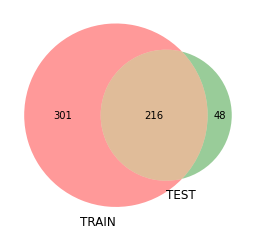

In [67]:
train_labels = set(cadec_train['code'].unique())
test_labels = set(cadec_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [68]:
cadec_train['code'] = cadec_train['code'].astype("category")
cadec_train.describe(include='all')

,term,start,end,sent,text,code,STR,SNMS
count,3520,3520.000000,3520.000000,3520,3520,3520.0,3520,3520
unique,2187,NaN,NaN,3474,1037,517.0,517,427
top,pain,NaN,NaN,.,I had been taking Lipitor 10mg for 2 years.<SE...,10033371.0,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
freq,106,NaN,NaN,11,22,302.0,302,302
mean,NaN,169.342330,182.800568,NaN,NaN,NaN,NaN,NaN
std,NaN,237.725039,237.875653,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,29.000000,41.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,88.000000,102.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,218.000000,231.250000,NaN,NaN,NaN,NaN,NaN


In [69]:
cadec_test['code'] = cadec_test['code'].astype("category")
cadec_test.describe(include='all')

,term,start,end,sent,text,code,STR,SNMS
count,881,881.000000,881.000000,881,881,881.0,881,881
unique,651,NaN,NaN,879,580,264.0,264,226
top,pain,NaN,NaN,.,I had been taking Lipitor 10mg for 2 years.<SE...,10033371.0,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
freq,26,NaN,NaN,2,8,83.0,83,83
mean,NaN,160.671964,173.426788,NaN,NaN,NaN,NaN,NaN
std,NaN,226.181464,226.330133,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,39.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,84.000000,95.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,195.000000,209.000000,NaN,NaN,NaN,NaN,NaN


In [71]:
train, test = cadec_train, cadec_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(10.0, (3650,), (2178,))

# PsyTar

In [72]:
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv')
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv')
psytar_train

,term,start,end,sent_idx,text,norm_form,code,STR,SNMS
0,loose stool for 2 weeks,83.0,106.0,1,"increased anxiety was the worst thing for me, ...",Loose stool,10024837.0,Loose bowel,"['Loose stool', 'Loose stool', 'Loose stool', ..."
1,have the jitters,229.0,245.0,4,Its really to early to tell for me.<SENT>I had...,Feeling jittery,10016338.0,Feeling jittery,['Feeling jittery']
2,slight schizophrenia,122.0,142.0,3,The 1ST time taking the Lexapro .<SENT>Slight ...,Schizophrenia,10039626.0,Schizophrenia,"['Schizophrenia', 'Schizophrenia, NOS', 'Schiz..."
3,nausea,NaN,NaN,1,"Insomnia, dry mouth, constipation, nausea.<SEN...",Nausea,10028813.0,Nausea,"['Nausea', 'Nausea', 'Nausea', 'Nausea', 'Naus..."
4,agitated,37.0,45.0,1,"feel wired, feel homicidal/suicidal, agitated,...",Agitation,10001497.0,Agitation,"['Agitation', 'Increased purposeless goalless ..."
...,...,...,...,...,...,...,...,...,...
3187,constipation,0.0,13.0,1,"Constipation .<SENT>painful, extreme, and cons...",Constipation,10010774.0,Constipation,"['Constipation', 'Constipation', 'Constipation..."
3188,gained 15 lbs,68.0,81.0,2,was very tried until I started taking concerta...,Weight Gain,10047899.0,Weight increased,"['Weight gain', 'Weight gain', 'Increased body..."
3189,not give a rats ass about anything,150.0,184.0,2,"Extreme irritability, weight gain and sleeples...",Apathy,10024642.0,Listless,"['Apathy', 'Apathy', 'Apathy', 'Apathetic beha..."
3190,"dryness, eyes",NaN,NaN,3,"Vivid dreams, and remember them in such great ...",Dryness of eye,10013774.0,Dry eye,"['Dryness of eye', 'Dry eye', 'Dry eye', 'Dry ..."


In [73]:
psytar_train.shape, psytar_test.shape

((3192, 9), (798, 9))

In [74]:
psytar_train['term'].apply(lambda x: len(x.split())).sum(), \
psytar_test['term'].apply(lambda x: len(x.split())).sum(), \
(psytar_train['start'] - psytar_train['end']).mean(), \
(psytar_train['start'] - psytar_train['end']).min(), \
(psytar_train['start'] - psytar_train['end']).max()

(9157, 2241, -17.115221579961464, -112.0, -3.0)

<AxesSubplot:xlabel='code', ylabel='Count'>

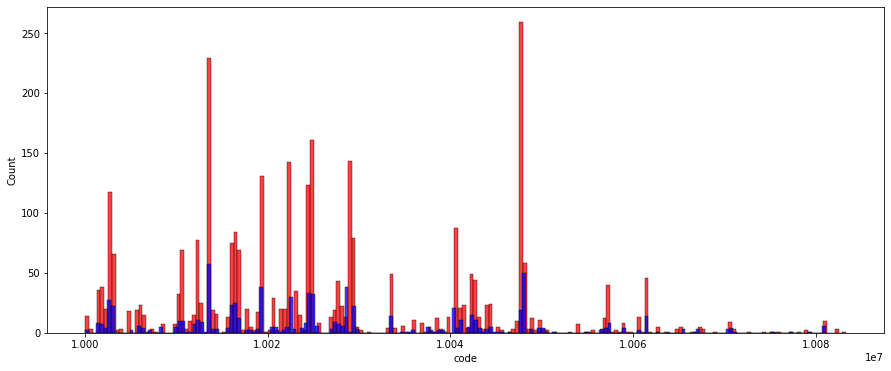

In [75]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=psytar_train['code'], bins=bins, color='red')
sns.histplot(data=psytar_test['code'], bins=bins, color='blue')

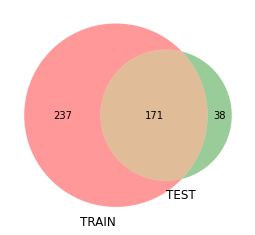

In [76]:
train_labels = set(psytar_train['code'].unique())
test_labels = set(psytar_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [77]:
psytar_train['code'] = psytar_train['code'].astype("category")
psytar_train.describe(include='all')

,term,start,end,sent_idx,text,norm_form,code,STR,SNMS
count,3192,2595.000000,2595.000000,3192.000000,3192,3192,3192.0,3192,3192
unique,2019,NaN,NaN,NaN,769,411,408.0,408,356
top,weight gain,NaN,NaN,NaN,"sweating,dizziness, severe dry mouth (coughing...",Sleeplessness,10022437.0,Insomnia,[]
freq,79,NaN,NaN,NaN,26,142,142.0,142,227
mean,NaN,171.440848,188.556069,2.598684,NaN,NaN,NaN,NaN,NaN
std,NaN,228.737283,230.291435,2.660275,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,5.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,40.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,87.000000,102.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,227.000000,245.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [78]:
psytar_test['code'] = psytar_test['code'].astype("category")
psytar_test.describe(include='all')

,term,start,end,sent_idx,text,norm_form,code,STR,SNMS
count,798,655.000000,655.000000,798.000000,798,798,798.0,798,798
unique,600,NaN,NaN,NaN,456,210,209.0,209,185
top,nausea,NaN,NaN,NaN,"sweating,dizziness, severe dry mouth (coughing...",Nausea,10028813.0,Nausea,[]
freq,15,NaN,NaN,NaN,11,36,36.0,36,59
mean,NaN,183.745038,200.607634,2.662907,NaN,NaN,NaN,NaN,NaN
std,NaN,260.990944,262.610257,2.876444,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,23.500000,39.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,85.000000,102.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,223.500000,241.500000,3.000000,NaN,NaN,NaN,NaN,NaN


In [79]:
train, test = psytar_train, psytar_test
dataset = pd.concat([train, test])

median_synonims = dataset[['code', 'SNMS']]
median_synonims['SNMS'] = median_synonims['SNMS'].apply(lambda x: len(eval(x)))
median_synonims_num = median_synonims.groupby('code').agg('mean').median()

median_synonims_num['SNMS'], \
train['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape, \
test['SNMS'].apply(lambda x: eval(x)).explode('SNMS').unique().shape

/home/kaigorodov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(8.0, (3036,), (1586,))

# Compare TRAIN SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

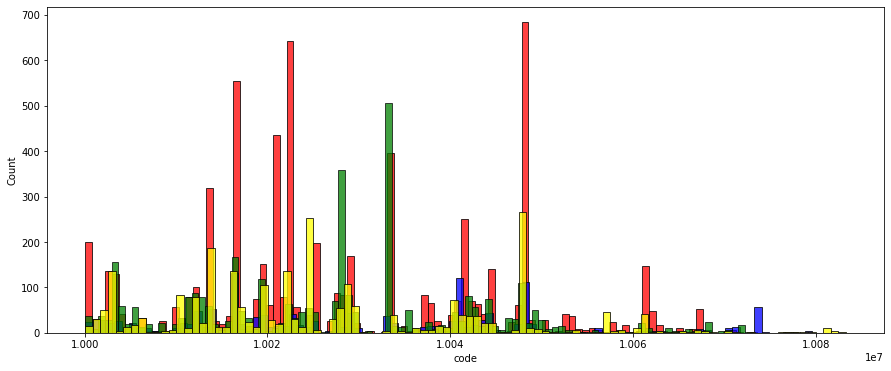

In [33]:
# smm4h17_train
# smm4h21_train
# cadec_train
# psytar_train

smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv').dropna()
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv').dropna()
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv').dropna()
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_train['code'], bins=bins, color='blue')
sns.histplot(data=cadec_train['code'], bins=bins, color='green')
sns.histplot(data=psytar_train['code'], bins=bins, color='yellow')

# Compare TEST SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

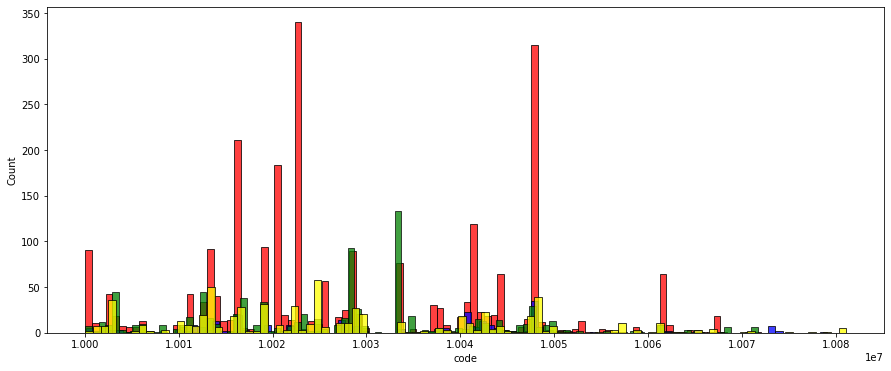

In [34]:
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv').dropna()
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv').dropna()
cadec_test= pd.read_csv('../../data/interim/cadec/test.csv').dropna()
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_test['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')
sns.histplot(data=cadec_test['code'], bins=bins, color='green')
sns.histplot(data=psytar_test['code'], bins=bins, color='yellow')

In [80]:
import multiprocessing as mp

In [103]:
def map_parallel(func, iterable, n_jobs=5):
    with mp.Pool() as p:
        t = p.starmap(func, [(i, 3) for i in ar])
    print(type(t))
    return t

In [106]:
f = lambda x, y: x + y

ar = [1, 2, 3, 4, 5, 6]



In [107]:
np.argmax(map_parallel(func, ar))

<class 'list'>


5